In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

data = pd.read_csv('LargeTrain1.csv')
train = pd.DataFrame(data)
target = 'Class'

C:\Users\test\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\test\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [23]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = len(np.unique(dtrain['Class']))
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    alg.fit(dtrain[predictors], dtrain['Class'])
        
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Class'].values, dtrain_predictions)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9985


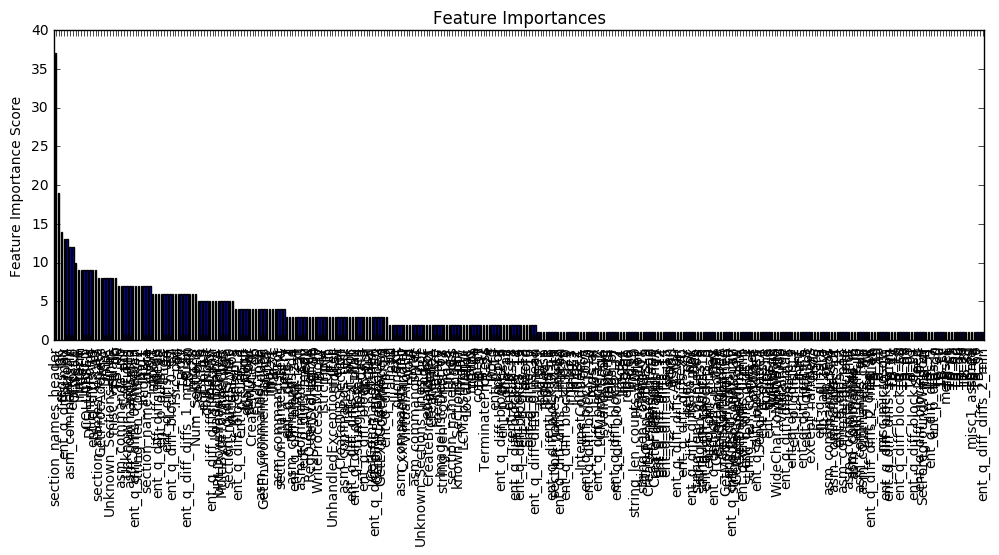

In [3]:
predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [5]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', scale_pos_weight=1, seed=27), 
 param_grid = param_test1 , n_jobs=4 , iid=False , cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.99034, std: 0.00232, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.98970, std: 0.00330, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.98877, std: 0.00223, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.99457, std: 0.00114, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.99338, std: 0.00099, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.99043, std: 0.00196, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.99476, std: 0.00085, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.99338, std: 0.00135, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.99135, std: 0.00222, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.99485, std: 0.00089, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.99347, std: 0.00102, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.99163, std: 0.00189, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 1

In [8]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', scale_pos_weight=1,seed=27), 
 param_grid = param_test3, n_jobs=4 , iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.99485, std: 0.00089, params: {'gamma': 0.0},
  mean: 0.99485, std: 0.00089, params: {'gamma': 0.1},
  mean: 0.99485, std: 0.00089, params: {'gamma': 0.2},
  mean: 0.99476, std: 0.00085, params: {'gamma': 0.3},
  mean: 0.99476, std: 0.00085, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.9948482803471391)


Model Report
Accuracy : 0.9993


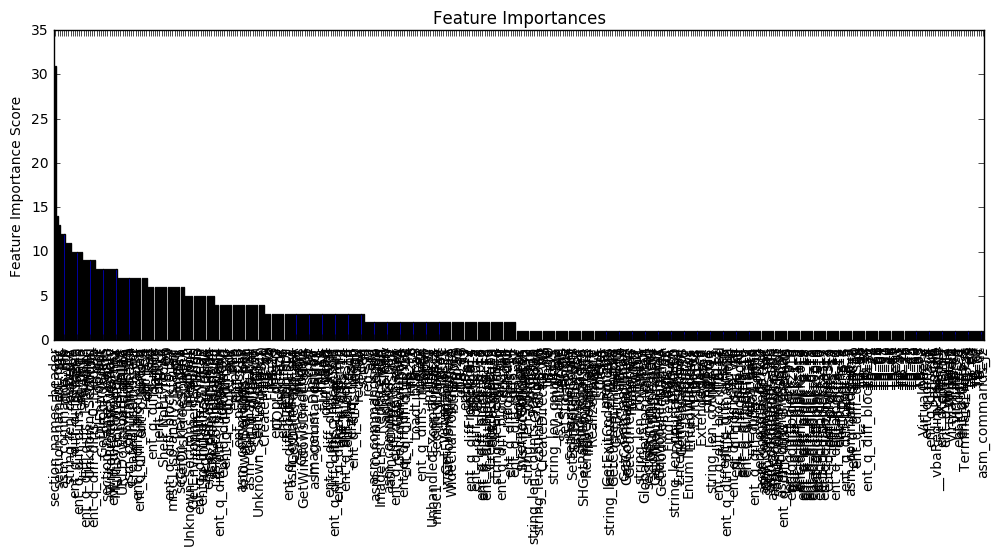

In [9]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [10]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', scale_pos_weight=1,seed=27), 
 param_grid = param_test4, n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.99430, std: 0.00147, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.99512, std: 0.00201, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.99540, std: 0.00127, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.99549, std: 0.00183, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.99466, std: 0.00125, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.99485, std: 0.00134, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.99494, std: 0.00140, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.99512, std: 0.00132, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.99448, std: 0.00148, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.99430, std: 0.00132, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.99485, std: 0.00089, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.99503, std: 0.00089, params: {'subsample': 0.9, 'colsample_bytree'

In [11]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.9 , colsample_bytree=0.6 ,
 objective= 'multi:softmax', scale_pos_weight=1,seed=27), 
 param_grid = param_test6 ,n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.99549, std: 0.00183, params: {'reg_alpha': 1e-05},
  mean: 0.99558, std: 0.00188, params: {'reg_alpha': 0.01},
  mean: 0.99558, std: 0.00166, params: {'reg_alpha': 0.1},
  mean: 0.99494, std: 0.00151, params: {'reg_alpha': 1},
  mean: 0.98518, std: 0.00295, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.9955825605742235)


Model Report
Accuracy : 0.9994


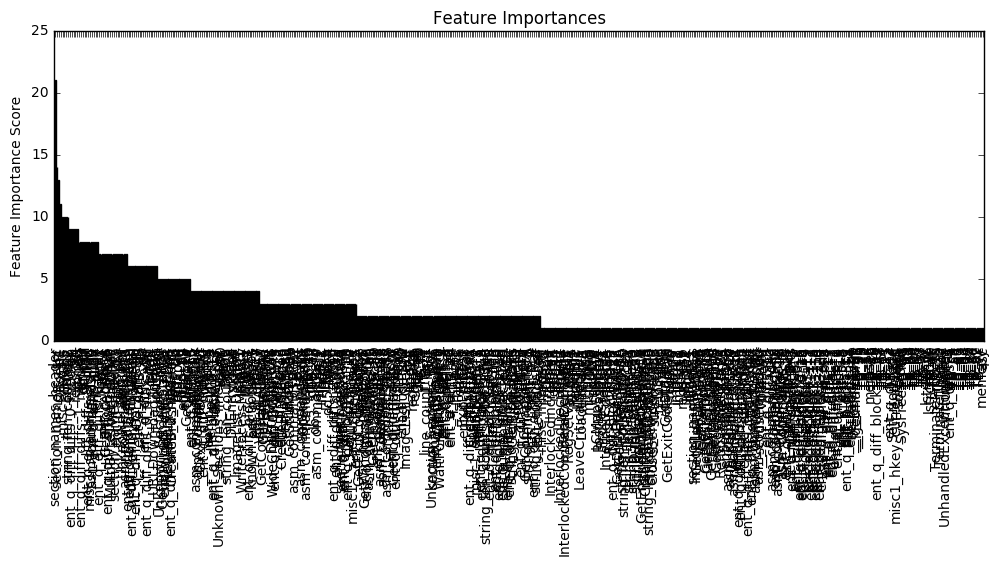

In [12]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.6,
 reg_alpha=0.1,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)


Model Report
Accuracy : 0.9988


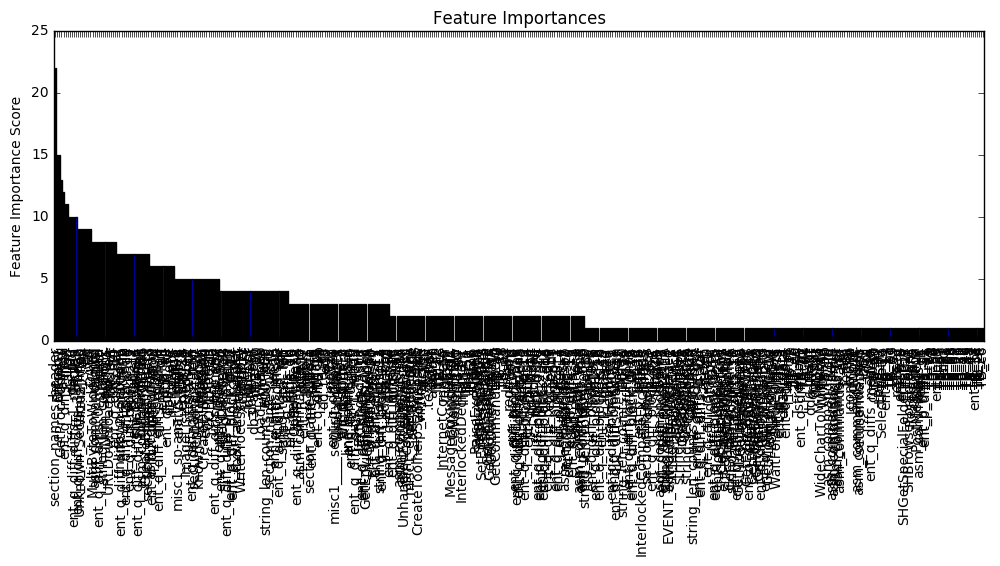

In [14]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=10,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.6,
 reg_alpha=0.1,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

Confusion matrix , without normalization
[[350   0   0   0   0   0   0   0   0]
 [  0 626   0   0   0   0   0   0   0]
 [  0   0 737   0   0   0   0   0   0]
 [  0   0   0 109   0   0   0   0   0]
 [  0   0   0   0   9   0   0   0   0]
 [  0   0   0   1   0 202   0   0   0]
 [  1   0   0   0   0   0 110   0   0]
 [  1   0   0   1   0   0   0 307   0]
 [  0   0   0   0   0   0   0   1 262]]


<function matplotlib.pyplot.show>

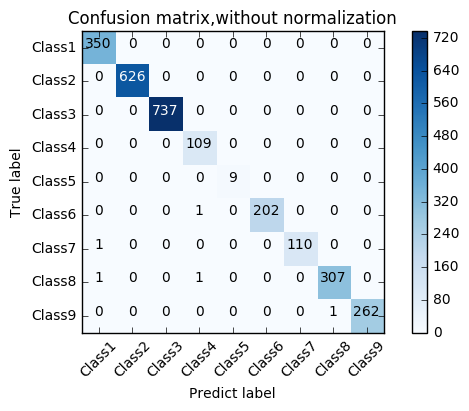

In [13]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm , classes , normalize=False , title='Confusion matrix' , cmap=plt.cm.Blues):
    plt.imshow(cm , interpolation='nearest' , cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation=45)
    plt.yticks(tick_marks , classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    else:
        print('Confusion matrix , without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j , i , cm[i,j] , horizontalalignment='center' , color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    
data = pd.read_csv('LargeTrain.csv')
target = 'Class'
train = [x for x in data.columns if x!= target]
class_name = ['Class' + str(x) for x in range(1,10)]
X = data[train]
y = data[target]

X_train , X_test , y_train , y_test = train_test_split(X, y , random_state=0)
clf = XGBClassifier(max_depth=9,min_child_weight=1,gamma=0,subsample=0.9,colsample_bytree=0.6,reg_alpha=0.1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test , y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_name,title='Confusion matrix,without normalization')
plt.show

# binary - xgboost

In [3]:
train2 = pd.DataFrame(data)
a = train2.ix[:,'Class'] >= 1
train2['Class'][a] = 1

C:\Users\test\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [2]:
def modelfit_1(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Class'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Class'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Class'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9987
AUC Score (Train): 0.999977


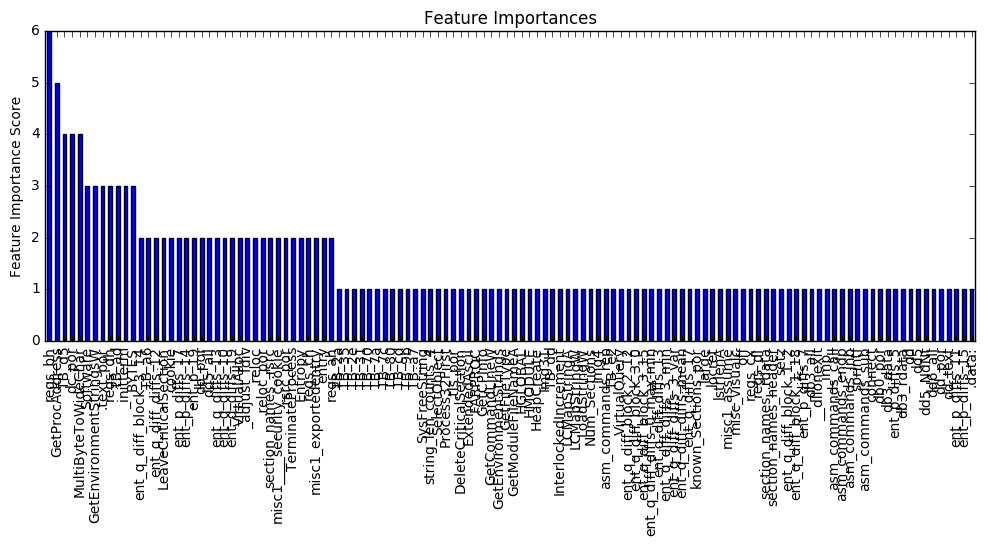

In [28]:
predictors = [x for x in train2.columns if x not in [target]]
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=7,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit_1(xgb5, train2, predictors)

In [11]:
param_test7 = {
 'max_depth':range(3,10,2)
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train2[predictors],train2[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.99946, std: 0.00075, params: {'max_depth': 3},
  mean: 0.99991, std: 0.00006, params: {'max_depth': 5},
  mean: 0.99991, std: 0.00008, params: {'max_depth': 7},
  mean: 0.99991, std: 0.00008, params: {'max_depth': 9}],
 {'max_depth': 9},
 0.9999088093030721)

In [13]:
param_test8 = {
 'min_child_weight':range(1,6,2)
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch8.fit(train2[predictors],train2[target])
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

([mean: 0.99991, std: 0.00006, params: {'min_child_weight': 1},
  mean: 0.99990, std: 0.00005, params: {'min_child_weight': 3},
  mean: 0.99983, std: 0.00006, params: {'min_child_weight': 5}],
 {'min_child_weight': 1},
 0.9999084839226932)

In [14]:
param_test9 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch9 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test9, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch9.fit(train2[predictors],train2[target])
gsearch9.grid_scores_, gsearch9.best_params_, gsearch9.best_score_

([mean: 0.99991, std: 0.00008, params: {'gamma': 0.0},
  mean: 0.99991, std: 0.00008, params: {'gamma': 0.1},
  mean: 0.99990, std: 0.00008, params: {'gamma': 0.2},
  mean: 0.99990, std: 0.00008, params: {'gamma': 0.3},
  mean: 0.99990, std: 0.00007, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.9999088093030721)

In [27]:
param_test10 = {
 'subsample':[i/13.0 for i in range(6,13)]
}
gsearch10 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test10, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch10.fit(train2[predictors],train2[target])
gsearch10.grid_scores_, gsearch10.best_params_, gsearch10.best_score_

([mean: 0.99988, std: 0.00008, params: {'subsample': 0.46153846153846156},
  mean: 0.99988, std: 0.00006, params: {'subsample': 0.5384615384615384},
  mean: 0.99992, std: 0.00004, params: {'subsample': 0.6153846153846154},
  mean: 0.99990, std: 0.00008, params: {'subsample': 0.6923076923076923},
  mean: 0.99991, std: 0.00006, params: {'subsample': 0.7692307692307693},
  mean: 0.99992, std: 0.00007, params: {'subsample': 0.8461538461538461},
  mean: 0.99995, std: 0.00002, params: {'subsample': 0.9230769230769231}],
 {'subsample': 0.9230769230769231},
 0.9999505855933013)

In [16]:
param_test11 = {
 'colsample_bytree':[i/10.0 for i in range(6,10)] 
}
gsearch11 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test11, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch11.fit(train2[predictors],train2[target])
gsearch11.grid_scores_, gsearch11.best_params_, gsearch11.best_score_

([mean: 0.99996, std: 0.00001, params: {'colsample_bytree': 0.6},
  mean: 0.99996, std: 0.00002, params: {'colsample_bytree': 0.7},
  mean: 0.99991, std: 0.00008, params: {'colsample_bytree': 0.8},
  mean: 0.99988, std: 0.00007, params: {'colsample_bytree': 0.9}],
 {'colsample_bytree': 0.6},
 0.9999627699392575)

In [18]:
param_test12 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch12 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test12, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch12.fit(train2[predictors],train2[target])
gsearch12.grid_scores_, gsearch12.best_params_, gsearch12.best_score_

([mean: 0.99997, std: 0.00001, params: {'reg_alpha': 1e-05},
  mean: 0.99997, std: 0.00001, params: {'reg_alpha': 0.01},
  mean: 0.99997, std: 0.00001, params: {'reg_alpha': 0.1},
  mean: 0.99997, std: 0.00002, params: {'reg_alpha': 1},
  mean: 0.99976, std: 0.00008, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.9999683375839672)

In [19]:
param_test13 = {
 'reg_alpha':[0, 0.7 , 0.5 , 1 , 1.5]
}
gsearch13 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test13, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch13.fit(train2[predictors],train2[target])
gsearch13.grid_scores_, gsearch13.best_params_, gsearch13.best_score_


([mean: 0.99997, std: 0.00001, params: {'reg_alpha': 0},
  mean: 0.99996, std: 0.00001, params: {'reg_alpha': 0.7},
  mean: 0.99996, std: 0.00001, params: {'reg_alpha': 0.5},
  mean: 0.99997, std: 0.00002, params: {'reg_alpha': 1},
  mean: 0.99996, std: 0.00002, params: {'reg_alpha': 1.5}],
 {'reg_alpha': 1},
 0.9999683375839672)


Model Report
Accuracy : 0.9993
AUC Score (Train): 0.999995


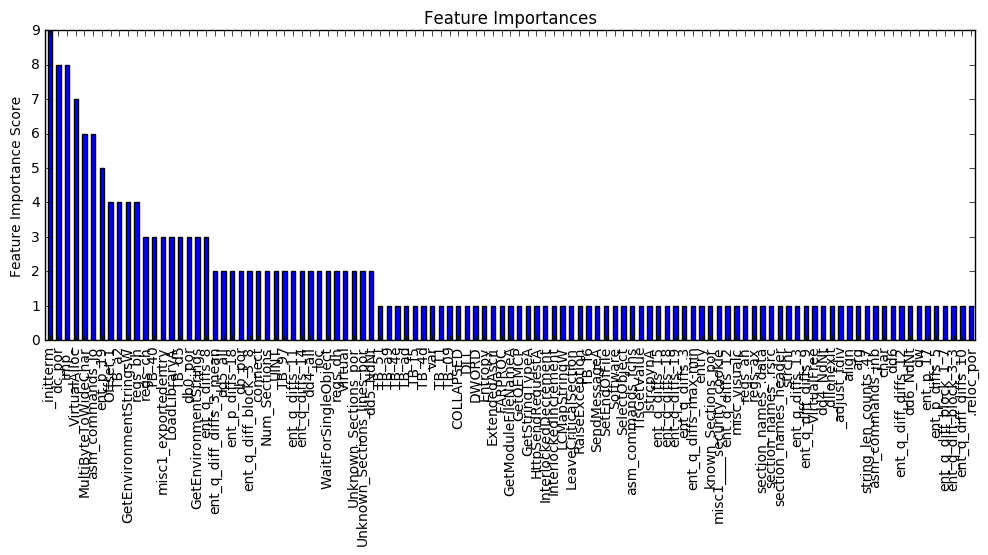

In [25]:
xgb6 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.6,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit_1(xgb6, train2, predictors)